### Band Structure and DOS Plotting

This workbook uses the pymatgen electronic_structure module to generate plots of the density of states and band structures from VASP output, specifically vasprun.xml files. This workbook was compiled in Jan. 23 by Gordon Peterson (Argonne National Lab, gpeterson@anl.gov) in Python 3.9.12 with Pymatgen 2022.11.7 (www.pymatgen.org). VASP5 was used for DFT calculations.

NOTE: You will need 2 distinct vasprun.xml files. 
1. 'vasprunDOS.xml' should come from a ncf calculation (ICHARG = 11) on a gamma-centered kpoint grid (KSPACING = ...) using the tetrahedron method (ISMEAR = -5).
2. 'vasprunBS.xml' should come from a ncf calculation (ICHARG = 11) on a high symmetry path of k-points (e.g. created by vaspkit or manually from Brillouin Zone and named 'KPOINTS') using ISMEAR = 0. If you try to generate a DOS from this vasprun.xml file it will not be correct!!!

Generally, the workflow to produce these files will look like this:
1. Generate a POSCAR and POTCAR corresponding to the structure of interest.
2. Copy an INCAR file from a prior calculation. Set the tags for geometry optimization using ISMEAR = 0 or -5 for metals or insulators appropriately. Set KSPACING to a reasonable value (e.g. 0.1-0.2), and check IBZKPOINTS to see if N k-points is reasonable. Run a self consistent calculation (ICHARG = 2).
3. Copy the resulting CONTCAR geometry back to the POSCAR, and run further scf calculations until good convergence. Finally, turn off the ionic steps and run a last scf calculation using ISMEAR = -5. This calculation produces the most correct Total Energy.
4. Now that you have produced a converged CHGCAR, you will run two non-self consistent calculations with ICHARG = 11. The first one will generate the DOS. Leave ISMEAR = -5 and increase the k-point density to increase the fidelity of the DOS. When the calculation is done, save the resulting vasprun.xml file as vasprunDOS.xml
5. The second ncf calculation will generate the band structure. Create a KPOINTS file containing the high symmetry points through the Brillouin Zone, either manually or by using a tool like vaspkit (example: https://www.vasp.at/wiki/index.php/KPOINTS). Change ISMEAR = 0, run the calculation, and save the resulting vasprun.xml file as vasprunBS.xml. 
6. You are now ready to run this notebook. Copy the vasprunDOS.xml, vasprunBS.xml, and KPOINTS files to the working directory for this notebook.

Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSDOSPlotter, BSPlotter, DosPlotter, BSPlotterProjected
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
%matplotlib inline

Define input files and plotting variables here:

In [2]:
filepath = 'PdAl_example/'
vasprunDOS_filename = 'vasprunDOS.xml'
vasprunBS_filename = 'vasprunBS.xml'

DOS_energy_range = (-10,10)
BS_energy_range = (-10,10)

Plot DOS from DOS vasprun file

DOS Fermi Energy: 10.60196707


C:\Users\gpeterson\Miniconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:1106: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\gpeterson\Desktop\BS-DOS_Plotter\PdAl_example
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")


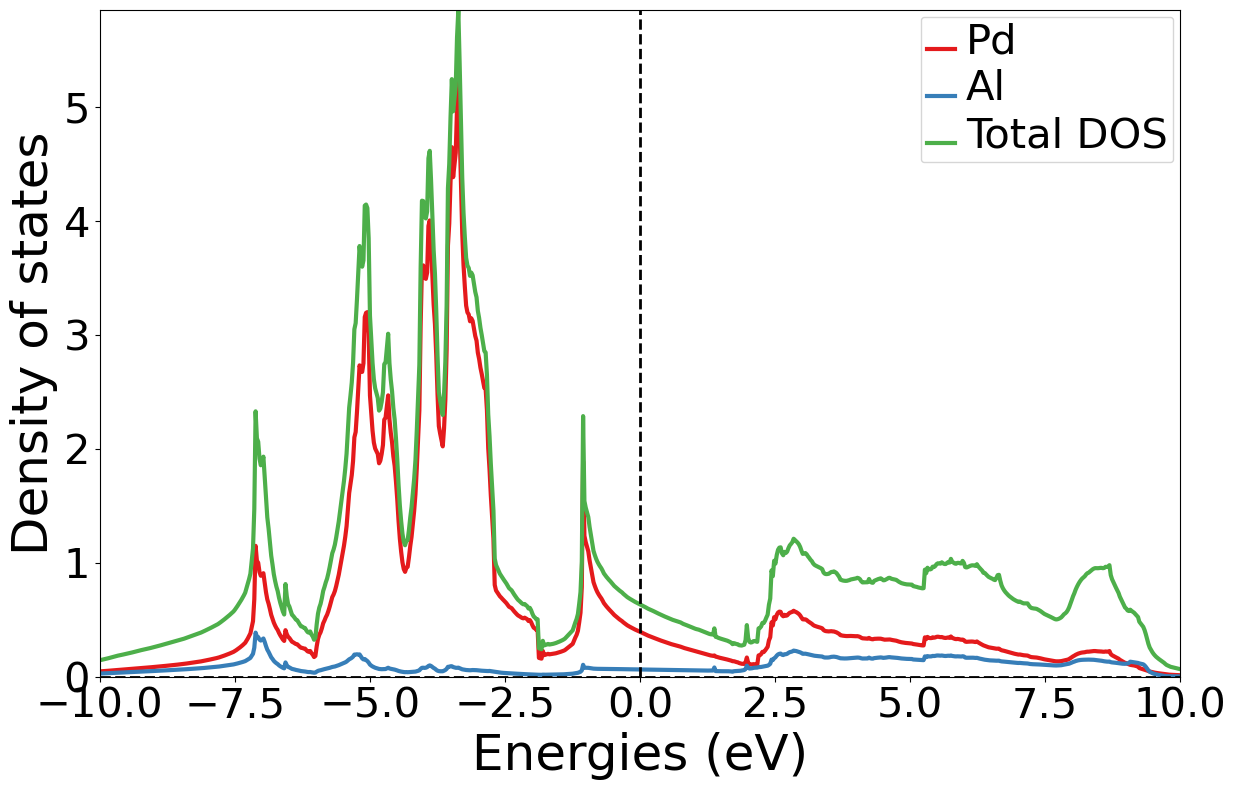

In [3]:
vasprun = Vasprun(f'{filepath}{vasprunDOS_filename}',parse_dos=True)

dos = vasprun.complete_dos
print('DOS Fermi Energy:',vasprun.efermi)


dosplot = DosPlotter()
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plt = dosplot.get_plot()
plt.xlim(DOS_energy_range)
plt.show()

Plot projected band structure from bandstructure vasprun and KPOINTS files

In [4]:
bsvasprun = BSVasprun(f'{filepath}{vasprunBS_filename}',parse_projected_eigen=True)
bs = bsvasprun.get_band_structure(f'{filepath}KPOINTS')
bsplot = BSPlotterProjected(bs)

<module 'matplotlib.pyplot' from 'C:\\Users\\gpeterson\\Miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

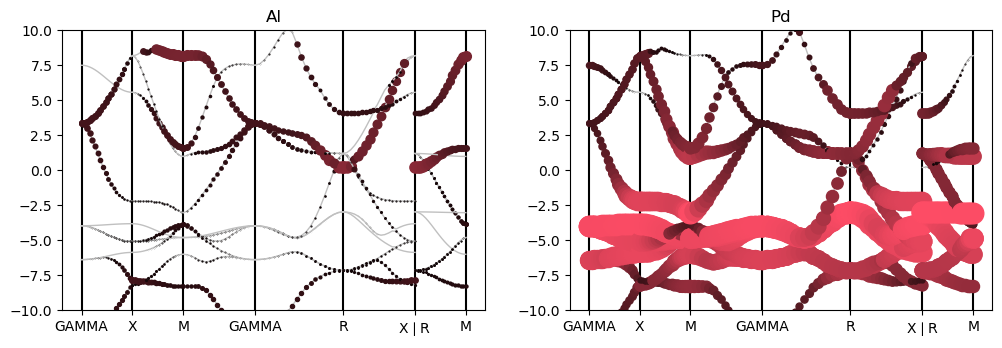

In [5]:
bsplot.get_elt_projected_plots(ylim=BS_energy_range)

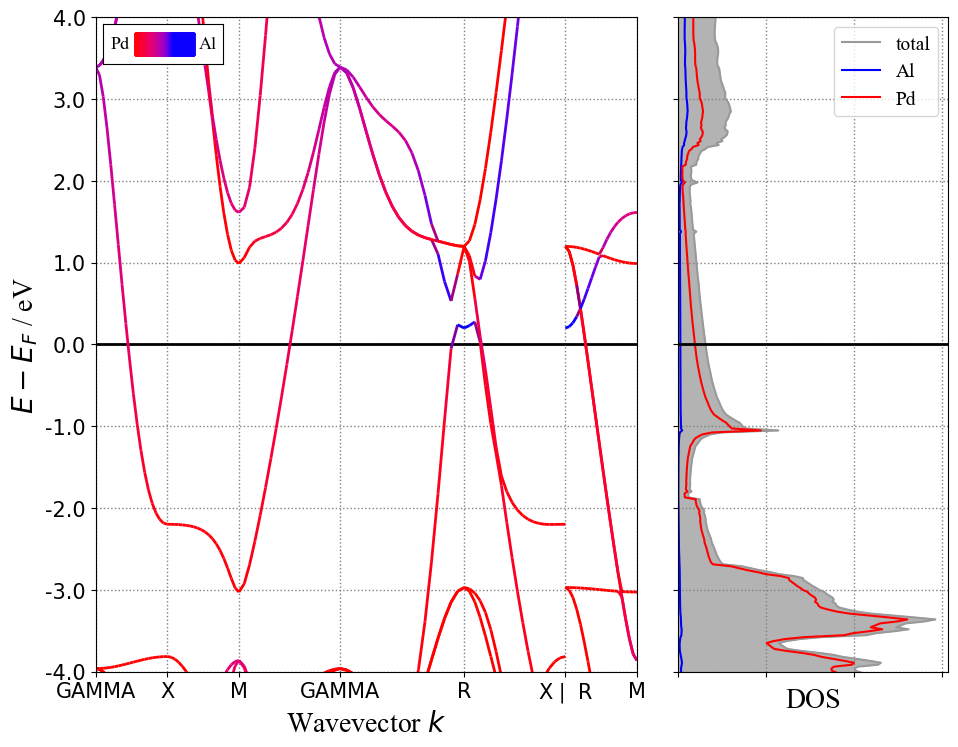

In [6]:
bsdosplot = BSDOSPlotter(
    bs_projection = 'elements',
    dos_projection = 'elements')

bsdosplot.get_plot(bs,dos).show()